# Trabalho prático 3

# Trabalho realizado por:

-Miguel Silvestre Nº45101

-Miguel Távora    Nº45102

-Pedro Dias       Nº45170

# Introdução 

Para o presente trabalho prático consiste em realizar uma modulação e desmodulação QPSK e a simulação de um canal AWGN.

A partir das funções de modulação e do canal e com as funções realizadas nos anterior trabalhos práticos, irá ser simulada a transmissão completa de um sinal por todas as funções.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from scipy import special

# Exercício 1

A modulação QPSK consiste em atribuir uma fase de um cos a cada conjunto de 2 bits.

In [6]:
def modulation_QPSK(signal,npoints,eb):

	continous = np.arange(len(signal)*int(npoints/2),dtype = np.float64)

	time = np.arange(npoints)
	amplitude = np.sqrt(eb*2)

	#criar cossenos para cada fase possível
	coss = amplitude*np.cos(((2*np.pi)/npoints)*time+(np.pi/4))
	coss1 = amplitude*np.cos(((2*np.pi)/npoints)*time+(np.pi-np.pi/4))
	coss2 = amplitude*np.cos(((2*np.pi)/npoints)*time+(np.pi+np.pi/4))
	coss3 = amplitude*np.cos(((2*np.pi)/npoints)*time+(-np.pi/4))
	
	#atribuição dos npoints dos cossenos para cada conjunto 2 bits
	for a in range(int(len(signal)/2)):
		if(signal[a*2] == 0 and signal[a*2+1] == 0):
			continous[a*npoints:a*npoints+npoints] = coss[:]

		elif(signal[a*2] == 0 and signal[a*2+1] == 1):
			continous[a*npoints:a*npoints+npoints] = coss1[:]

		elif(signal[a*2] == 1 and signal[a*2+1] == 0):
			continous[a*npoints:a*npoints+npoints] = coss2[:]

		else:
			continous[a*npoints:a*npoints+npoints] = coss3[:]

	return continous

Os pontos atribuidos para cada fase foi:
-  π/4 -> [0,0]
- 3π/4 -> [0,1]
- 5π/4 -> [1,0]
- 7π/4 -> [1,1]

# Exercício 2

A desmodulação consiste em cada conjunto de npontos ir buscar os dois bits que o geraram.

In [7]:
def demodulation_QPSK(signal,npoints,eb):

	iteration = int(len(signal)/npoints)

	discrete = np.zeros(int(len(signal)/int((npoints/2))),dtype=np.uint8)

	phase = np.array([[0,0],[0,1],[1,0],[1,1]],dtype=np.uint8)

	n = np.arange(0,npoints)

	#sen e con generico para multiplicar
	cs = np.cos(((2*np.pi)*n/npoints))
	cs2 = np.sin(((2*np.pi)*n/npoints))

	for c in range(iteration):
		#buscar o npoints do sinal multiplicar pelo sen e cos generico
		#final sumar tudo e verificar a fase
		y = signal[c*npoints:c*npoints+npoints]
		ci = np.dot(cs,y)
		si = np.dot(cs2,y)

		s1 = np.sum(si*np.sqrt(2*eb))
		c1 = np.sum(ci*np.sqrt(2*eb))

		if(s1 > 0 and  c1 > 0):
			discrete[c*2:c*2+2] = phase[3]

		elif(s1 > 0 and c1 < 0 ):
			discrete[c*2:c*2+2] = phase[2]

		elif(s1 < 0 and c1 < 0 ):
			discrete[c*2:c*2+2] = phase[1]

		elif(s1< 0 and c1 > 0 ):
			discrete[c*2:c*2+2] = phase[0]

		else:
			print("erro")

	return discrete

Para sabes a que fase pertence cada conjunto de dois bits, foi verificado o quadrante da somatório da multiplicação por um sen e cos generico de cada conjunto de npontos.

# Exercício 3

O canal AWGN consiste em adicionar ruído ao sinal modulado.

In [8]:
def AWGN_channel(signal,noise):
	#o np.random.randn retorna um array e para cada valor do QPSK é adicionado o valor do ruido
	return signal + np.sqrt(noise) * np.random.randn(len(signal))

Para simular o ruído amultiplica-se ao valor escolhido como ruído um valor aleatório e incrementa-se esse valor no sinal.

# Exercício 4

In [ ]:
Demonstração grafica dos cossenos:

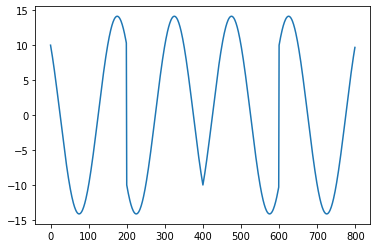

In [3]:
def show_graph(signal):

	value = modulation_QPSK(signal,200,100)

	plt.plot(value)

	plt.show()
    
show_graph([0,0,0,1,1,0,1,1])

In [ ]:
Comparação dos valores com os valores:

In [8]:
def compare_with(sign,sign_noise):
	count = 0

	for a in range(len(sign)):
		if(sign[a] ==  sign_noise[a]):
			count+= 1

	return count

bin_sequence = [0,1,1,0,1,1,0,0]

ex_mod = modulation_QPSK(bin_sequence,8,1)

ex_mod_channel= AWGN_channel(ex_mod,1e-1)

ex_demod = demodulation_QPSK(ex_mod_channel,8,1)

compare_1 = compare_with(bin_sequence,ex_demod)

print("Número de valores iguais em 8 para Ruído de 1e-1:",compare_1)


#################################################

ex_mod_channel_1= AWGN_channel(ex_mod,0.5)

ex_demod_1 = demodulation_QPSK(ex_mod_channel_1,8,1)

compare_2 = compare_with(bin_sequence,ex_demod_1)

print("Número de valores iguais em 8 para Ruído de 0.5:",compare_2)


#################################################

ex_mod_channel_2= AWGN_channel(ex_mod,1)

ex_demod_2 = demodulation_QPSK(ex_mod_channel_2,8,1)

compare_3 = compare_with(bin_sequence,ex_demod_2)

print("Número de valores iguais em 8 para Ruído de 1:",compare_3)

#################################################

ex_mod_channel_3= AWGN_channel(ex_mod,2)

ex_demod_3 = demodulation_QPSK(ex_mod_channel_3,8,1)

compare_4 = compare_with(bin_sequence,ex_demod_3)

print("Número de valores iguais em 8 para Ruído de 2:",compare_4)

Número de valores iguais em 8 para Ruído de 1e-1: 8
Número de valores iguais em 8 para Ruído de 0.5: 8
Número de valores iguais em 8 para Ruído de 1: 8
Número de valores iguais em 8 para Ruído de 2: 6


# Exercicio 5

In [ ]:
Para a realização do exercício foram utilizados os valores fornecidos no enunciado

In [9]:
def criarTabelas (bits, vMax, typeQ):
    quantificacao = []
    decisao = []

    delta = (2.0*vMax)/2**bits

    if(typeQ == "midrise"):
        # 1o termo = vMax - delta/2
        decisao = np.arange (-vMax + delta, vMax + delta, delta) # Decisao
        quantificacao = np.arange (-vMax + (delta/2), vMax, delta) # Quantificao

    elif (typeQ == "midtread"):
        # 1o termo = vMax
        decisao = np.arange (-vMax + delta/2, vMax, delta)
        quantificacao = np.arange (-vMax + delta, vMax + delta, delta)
    else:
        print ("Erro")

    return quantificacao, decisao
    
def quantifica_sinal(sinal,nbits):
    
    vMax = np.max(sinal)
    niveis_quantizacao,niveis_decisao = criarTabelas(nbits, vMax, 'midrise')
    
    indices_quantizacao = lambda l : np.searchsorted(niveis_decisao,sinal)
    lista_indices_quantizacao = indices_quantizacao(sinal)
    
    valores_quantizados = lambda i : niveis_quantizacao[lista_indices_quantizacao]
    
    return (indices_quantizacao(sinal).astype(np.uint8),valores_quantizados(lista_indices_quantizacao))

In [10]:
def codificador(signal,R):

	#vai buscar os ultimos bits dependendo de R, adiciona 0 a esquerda aos que n chega ao valor R de bits
    bin_values= list(map(lambda x: np.binary_repr(x).zfill(R)[-R:],signal))


	#separa os bits de string para char tipo: '0101' -> '0','1','0','1'
    every_bit = np.array(list(map(lambda x: list(x),bin_values)))

	#transformar ndarray 2d em 1d
    d1_copy = every_bit.ravel()#pode ser ravel ou flatten(flatten cria uma copia, ravel aponta pra mesma memoria)

	#converter char pra int
    d1_copy = d1_copy.astype(np.uint8)

    return d1_copy

def cod_image(width,height,padding):

    st_width = np.array(list(np.binary_repr(width)))

    st_height = np.array(list(np.binary_repr(height)))

    pre_value = np.insert(padding,0,st_height)

    result = np.insert(pre_value,0,st_width).astype(np.uint8)

    return result

def descodifier(signal,nbits):
    number = 0

    #array para guardar os valores
    values = np.arange(len(signal)/nbits)

    #convete num array bidimensional
    signal_2d = np.reshape(signal,(-1,nbits))

    #dois ciclos para ir a cada posição e multiplicar por 2 o indice
    for n in range(len(signal_2d)):
        for i in range(len(signal_2d[0])):
             number=2*number+signal_2d[n][i]

        values[n] = number
        number = 0

    return values.astype(np.uint8)



def descodifica_sindroma(s,size):
    n=0
    
    int_value = np.arange(size)
    for i in range(len(s)):
        for j in range(4):
            n=2*n+s[i][j]
        int_value[i] = n
        n=0
    return int_value

def descod_numbers(number,division):
    num = 0
    num2 = 0
    values = [] 

    for i in range(len(number)-division):
        num=2*num+number[i]

    for l in range(len(number)-division,len(number)):
        num2=2*num2+number[l]

    values.append(num)
    values.append(num2)
    return values

def descod_number(number):
    num = 0

    for i in range(len(number)):
        num=2*num+number[i]

    return num

In [11]:
def cria_dicionario(indices, valores):

	Dict = {}

	for a in range(len(indices)):
		if indices[a] in Dict.keys():
			continue
		else:
			Dict[indices[a]] = valores[a]

	return Dict


def desquantifica(indices, dicionario):

	result = np.zeros(len(indices))

	for a in range(len(indices)):
		result[a] = dicionario.get(indices[a])

	return result.astype(np.uint8)

In [12]:
Tabela={
0:[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
12:[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
10:[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
9:[0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
6:[0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
5:[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0],
3:[0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
14:[0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
13:[0,0,0,0,0,0,0,1,0,0,0,0,0,0,0],
11:[0,0,0,0,0,0,0,0,1,0,0,0,0,0,0],
7:[0,0,0,0,0,0,0,0,0,1,0,0,0,0,0],
15:[0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],
8:[0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],
4:[0,0,0,0,0,0,0,0,0,0,0,0,1,0,0],
2:[0,0,0,0,0,0,0,0,0,0,0,0,0,1,0],
1:[0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],
}


def hamming(mensagem):
        l=[11-len(mensagem)%11]
        P= np.array([[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]])
        l=codificador(l,4)
      
        G= np.hstack((np.eye(11),P))
        
        if(len(mensagem)%11!=0):mensagem= np.pad(mensagem,(0,(11-len(mensagem)%11)),'constant')
        
        mensagem = np.reshape(mensagem,(-1,11))
        hamming = list(np.arange(len(mensagem)))
      
        for m in range(len(mensagem)):
                hamming[slice(m*15,m*15+15,1)] = (np.dot(mensagem[m],G)%2)

        hamming=np.insert(hamming,0,l).astype('uint8')
        return hamming


        
	
def error_dectetion_correction(signal,bitsremove):
        

        signal=np.reshape(np.array(signal),(-1,15))

        sindroma = np.arange(len(signal)*4,dtype="uint8")

        P= np.array([[1,1,0,0],[1,0,1,0],[1,0,0,1],[0,1,1,0],[0,1,0,1],[0,0,1,1],[1,1,1,0],[1,1,0,1],[1,0,1,1],[0,1,1,1],[1,1,1,1]])
        G= np.hstack((np.matrix.transpose(P),np.eye(4,dtype=np.uint8)))
        G=np.matrix.transpose(G)
        
        for s in range(len(signal)):
                
                sindroma[slice(s*4,s*4+4,1)] = (np.dot(signal[s],G)%2)

        sindroma = np.reshape(sindroma,(-1,4))
        
        valores=descodifica_sindroma(sindroma,len(sindroma))

        padroes=(list(map(lambda x:Tabela[x],valores)))
        
        sinal_final=(list(map(lambda x,y:np.bitwise_xor(x,y),signal,padroes)))

        sem_sindroma =  np.arange(len(sinal_final)*11)

        for n in range(len(sinal_final)):
                sem_sindroma[slice(n*11,n*11+11,1)] = sinal_final[n][:11]

        
        remove_bits = sem_sindroma[:len(sem_sindroma)-bitsremove]
        
        return remove_bits

In [20]:
# emissor
im_inicial = Image.open("lena_color.tif")
largura, altura = im_inicial.size

#converter num np.array
a = np.array(im_inicial)
b = a.flatten()
print("tamanho de b",len(b))
print("primeiros 20 valores da imagem:",b[0:20])


#quantificação
index ,valores = quantifica_sinal(b,12)
#criação dicionário para desquantificação
dicionario = cria_dicionario(index,valores)
print("primeiros 20 valores de quantificação:",index[0:20])


#codificação
cod = codificador(index,8)
print("tamanho de codificação:",len(cod))
print("primeiros 20 valores de codificação:",cod[0:20])


#hamming 15x11
ham = hamming(cod)
hed = cod_image(largura,altura,ham[0:4])



#modulação QPSK
mod = modulation_QPSK(ham[4:],8,1)

#canal AWGN 
noise_mod = AWGN_channel(mod,1e-1)


#desmodelador QPSK
demod = demodulation_QPSK(noise_mod,8,1)


#correção erros
padding = descod_number(hed[len(hed)-4:len(hed)])
error_correction = error_dectetion_correction(demod,padding)
print("tamanho após correção erros:",len(error_correction))
print("primeiros 20 valores após correção:",error_correction[0:20])

#descodificador
decod = descodifier(error_correction,8)
print("tamanho do decod",len(decod))
print("primeiros 20 valores de decodificação",decod[0:20])

#desquantificação
desq = desquantifica(decod,dicionario)
print("primeiros 20 valores após desquantificação:",desq[0:20])

#criação imagem
image_shape = descod_numbers(hed[0:20],10)
image_final = Image.fromarray(np.reshape(desq,(image_shape[0],image_shape[1],3)))
image_final.save("noisy_lena.bmp")

print("acabou")

tamanho de b 786432
primeiros 20 valores da imagem: [226 137 125 226 137 125 223 137 133 223 136 128 226 138 120 226 129 116
 228 138]
primeiros 20 valores de quantificação: [ 15  68 227  15  68 227 246  68  36 246  60 251  15  76 187  15   4 155
  31  76]
tamanho de codificação: 6291456
primeiros 20 valores de codificação: [0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0]
tamanho após correção erros: 6291456
primeiros 20 valores após correção: [0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0]
tamanho do decod 786432
primeiros 20 valores de decodificação [ 15  68 227  15  68 227 246  68  36 246  60 251  15  76 187  15   4 155
  31  76]
acabou


Para executar as seguintes intruções o programa demorou: --- 184.7424235343933 seconds ---

Os valores teoricos e práticos de SNR

In [8]:
def calculate_error(signal, original):

    error = np.arange(len(signal),dtype =np.float64)

    for a in range(len(signal)):
        error[a] = signal[a]-original[a]

    return error


def SNR_calculater(signal, original):

    error_index =  calculate_error(signal, original)

    Px = np.sum(np.power(signal,2))/len(signal)

    Peq = np.sum(np.power(error_index,2))/len(signal)

    SNR = 10*np.log10(Px/Peq)

    return SNR



def SNR_teorical(signal, nbits):

    Px = np.sum(np.power(signal,2))/len(signal)

    SNR = 6.02*nbits + 10*np.log10((3*Px)/(max(signal)**2))

    return SNR

Valores de SNR no canal para valores de ruído de 1e-1, 0.5, 1 e 2.

In [10]:
im_inicial = Image.open("lena_color.tif")
largura, altura = im_inicial.size

#converter num np.array
a = np.array(im_inicial)
b = a.flatten()

#quantificação
index ,valores = quantifica_sinal(b,12)
#criação dicionário para desquantificação
dicionario = cria_dicionario(index,valores)




#codificação
cod = codificador(index,8)


#hamming 15x11
ham = hamming(cod)
hed = cod_image(largura,altura,ham[0:4])



#modulação QPSK
mod = modulation_QPSK(ham[4:],8,1)

In [12]:
#canal AWGN
print("SNR no canal")
print()
noise_mod = AWGN_channel(mod,1e-1)
snr_1 = SNR_calculater(mod,noise_mod)
print("SNR com erro de 1e-1:",snr_1)

SNR no canal

SNR com erro de 1e-1: 91.37638362540022


In [12]:
noise_mod_2 = AWGN_channel(mod,0.5)
snr_2 = SNR_calculater(mod,noise_mod_2)
print("SNR com erro de 0.5:",snr_2)

SNR com erro de 0.5: 84.38493877481919


In [11]:
noise_mod_3 = AWGN_channel(mod,1)
snr_3 = SNR_calculater(mod,noise_mod_3)
print("SNR com erro de 1:",snr_3)

SNR com erro de 1: 81.37554025053188


In [11]:
noise_mod_4 = AWGN_channel(mod,2)
snr_4 = SNR_calculater(mod,noise_mod_4)
print("SNR com erro de 1:",snr_4)

SNR com erro de 1: 78.36433128717088


In [11]:
# emissor
im_inicial = Image.open("lena_color.tif")
largura, altura = im_inicial.size

#converter num np.array
a = np.array(im_inicial)
b = a.flatten()

#SNR no emissor
snr_antes = SNR_teorical(b,8)
print("SNR no emissor:",snr_antes)


#quantificação
index ,valores = quantifica_sinal(b,12)
#criação dicionário para desquantificação
dicionario = cria_dicionario(index,valores)


#codificação
cod = codificador(index,8)


#hamming 15x11
ham = hamming(cod)
hed = cod_image(largura,altura,ham[0:4])



#modulação QPSK
mod = modulation_QPSK(ham[4:],8,1)

#canal AWGN 
noise_mod = AWGN_channel(mod,1e-1)


#desmodelador QPSK
demod = demodulation_QPSK(noise_mod,8,1)


#correção erros
padding = descod_number(hed[len(hed)-4:len(hed)])
error_correction = error_dectetion_correction(demod,padding)

#descodificador
decod = descodifier(error_correction,8)

#desquantificação
desq = desquantifica(decod,dicionario)

#SNR no receptor
snr_depois = SNR_teorical(desq,8)
print("SNR no receptor:",snr_depois)

SNR no emissor: 25.104873137234648
SNR no receptor: 25.143209235336563


In [20]:
def calculate_BER(signal,original):
    
    count = 0

    signal = signal.astype(np.int8)
    original = original.astype(np.int8)

    for a in range(len(signal)):
        if(signal[a] - original[a] != 0):
            count += 1

    result = count/len(signal)

    return result

def QPSK_BER(signal, eb, n0):

	ber = 0.5*special.erfc(np.sqrt((eb/n0)))

	return ber

In [10]:
# emissor
im_inicial = Image.open("lena_color.tif")
largura, altura = im_inicial.size

#converter num np.array
a = np.array(im_inicial)
b = a.flatten()


#quantificação
index ,valores = quantifica_sinal(b,9)
#criação dicionário para desquantificação
dicionario = cria_dicionario(index,valores)


#codificação
cod = codificador(index,8)


#hamming 15x11
ham = hamming(cod)
hed = cod_image(largura,altura,ham[0:4])



#modulação QPSK
mod = modulation_QPSK(ham[4:],8,1)


#Canal AWGN
noise_mod = AWGN_channel(mod,2)


#desmodelador QPSK
demod = demodulation_QPSK(noise_mod,8,1)
ber_antes = QPSK_BER(demod,1,2)
print("BER antes da correção de erros: ",ber_antes)


#correção erros
padding = descod_number(hed[len(hed)-4:len(hed)])
error_correction = error_dectetion_correction(demod,padding)
ber_depois = calculate_BER(error_correction,cod)
print("BER depois da correção de erros: ",ber_depois)

BER antes da correção de erros:  0.15865525393145707
BER depois da correção de erros:  0.1266036033630371


In [21]:
# emissor
im_inicial = Image.open("lena_color.tif")
largura, altura = im_inicial.size

#converter num np.array
a = np.array(im_inicial)
b = a.flatten()


#quantificação
index ,valores = quantifica_sinal(b,10)
#criação dicionário para desquantificação
dicionario = cria_dicionario(index,valores)


#codificação
cod = codificador(index,8)


#modulação QPSK
mod = modulation_QPSK(cod,8,1)


#Canal AWGN
noise_mod = AWGN_channel(mod,2)


#desmodelador QPSK
demod = demodulation_QPSK(noise_mod,8,1)


ber_depois = calculate_BER(demod,cod)
print("BER sem correção erros: ",ber_depois)

#descodificador
decod = descodifier(demod,8)

#desquantificação
desq = desquantifica(decod,dicionario)


BER sem correção erros:  0.11173804601033528


Nos ficheiros encontram-se exemplos da imagem para quantificação de 1, 4, 8 e 12.
Todas as imagens sem o nome de quanti no nome foram geradas com uma quantificação de 12 bits.
Além de diversas quantificações também foram gerados com diversos valores de ruído, sendo eles de 0.1, 0.5, 1 e 2.

Perante os resultados obtidos somente o BER do sistema sem correção de erros é que deveria possuir um valor superior do BER em relação ao sistema com correção de erros. A parte disso todos os outros resultados aparentam corretos.

# Conclusão

Em suma, com o presente trabalho prático foi possível simular toda a transmissão de um sinal até um receptor atravessando todos os passos.
- Para isso inicialmente realiza-se a quantificação que é a transformação da analógica para amplitude discreta.
- Após isso é feita a codificação dos indices da quantificação, isto é transformar de um número decimal para binário.
- Para corrigir possíveis erros utiliza-se código de Hamming 15x11 onde para cada conjunto de 11 bits adiciona-se 4 bits de paridade para corrigir erros.
- De seguida é feita a modulação QPSK onde se transforma a cada dois conjunto bits se simula com uma fase de um cosseno.
- Esse sinal passa por um canal AWGN que adiciona ruído.
- De seguida desmodela-se obtendo os dois bits que originaram o sinal analógico.
- É feita a descodificação para obter o número inteiro do indice do valor que foi gerado na quantificação
- Por fim desquantifica-se para se obter o sinal original



